## using torch

In [1]:
!curl  "https://fastly.picsum.photos/id/77/450/300.jpg?grayscale&hmac=Ux7nzg19e1q35mlUVZjhCLxqkR30cC-CarVg-nlIf60" --output sea-lion.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28363  100 28363    0     0   193k      0 --:--:-- --:--:-- --:--:--  193k


In [2]:
!pip install segment-anything

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [6]:
import torch

In [4]:
import os
sam_checkpoint = "sam_vit_h_4b8939.pth"  # You can use other variants like 'sam_vit_l_0b3195.pth' or 'sam_vit_b_01ec64.pth'
model_type = "vit_h"  # Adjust based on the checkpoint used

if not os.path.exists(sam_checkpoint):
  !wget https://dl.fbaipublicfiles.com/segment_anything/$sam_checkpoint

--2024-11-12 13:29:09--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   270MB/s    in 11s     

2024-11-12 13:29:20 (226 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [7]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device='cuda' if torch.cuda.is_available() else 'cpu') # Move to GPU if available

mask_generator = SamAutomaticMaskGenerator(sam) # For automatic mask generation
# Or use SamPredictor(sam) for more control with prompts

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt

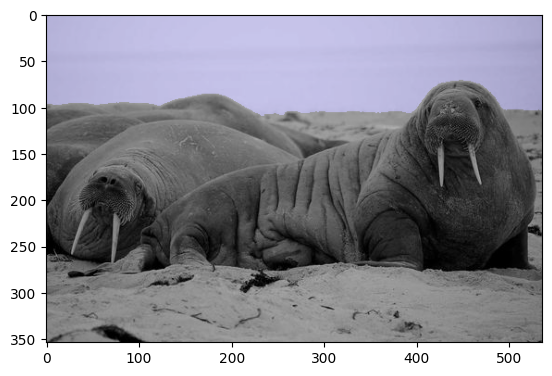

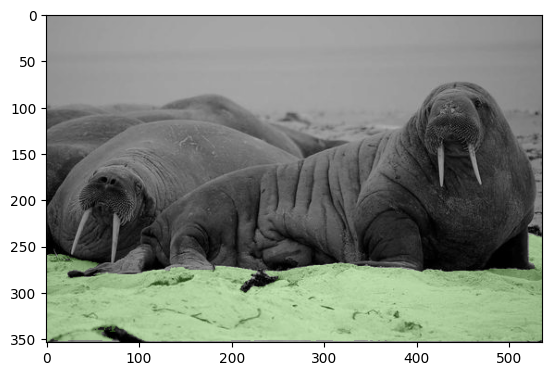

In [ ]:
# Load your image (replace with your image path)
image = cv2.imread("/content/sea-lion.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate masks
masks = mask_generator.generate(image)

# Visualize results (example)
for mask in masks:
    # Extract segmentation mask
    segmentation_mask = mask['segmentation']

    # Create overlay (similar to your existing code)
    colored_mask = np.zeros_like(image)
    colored_mask[segmentation_mask] = np.random.randint(0, 255, size=3)  # Assign random color
    overlay = cv2.addWeighted(image, 0.7, colored_mask, 0.3, 0)

    # Display or save the overlay
    plt.imshow(overlay)
    plt.show()